# Linear Regression Using Normal Equation

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
class lin_reg:
    
    def __init__(self, x, y):
        self.x = np.array(x)# x is feature
        self.m = self.x.shape[0]# number of examples
        self.n = self.x.shape[1]#number of features
        self.y = np.array(y).reshape(self.m, 1)# y is target variable
        self.theta = np.zeros((self.n+1,1))# parameters
    
    def train(self):
        
        ones = np.ones((self.m, 1))
        self.x = np.hstack((ones, self.x))# converting shape of x from m*n to m*n+1

        if self.x.shape != (self.m, self.n + 1):
            print('x shape error')

        if self.y.shape != (self.m, 1):
            print(self.y.shape, (self.m, 1) )
            print('y shape error')
            
        xt = self.x.transpose()
        z = np.linalg.inv(np.dot(xt, self.x))

        theta1 = np.dot(z, xt)
        theta = np.dot(theta1, self.y).reshape(self.n + 1, 1)# theta = (tr(x).x)^-1.tr(x).y : . represents matrix multiplication


        if theta.shape != (self.n + 1, 1):
            print('Calculation error in theta!')
        else: 
            self.theta = theta
            
    def pred(self, x_test):
        
        x_test = np.array(x_test).reshape(1, self.n)
        ones = np.ones((1, 1))
        x_test = np.hstack((ones, x_test))
        
        if x_test.shape != (1, self.n+1):
            print('x_test shape error')
            
        y_pred = np.dot(x_test, self.theta)
        return y_pred
        
    
    

In [43]:
x =[[2], [4 ], [8], [6]] # must be in m*n, where m = no of examples and n= no of features

In [44]:
y=[1, 10, 15, 18] # must be in m*1

In [45]:
model1 = lin_reg(x, y)

In [46]:
model1.train()

In [47]:
model1.pred([5])

array([[11.]])

In [48]:
model1.theta # parameters

array([[-1.5],
       [ 2.5]])

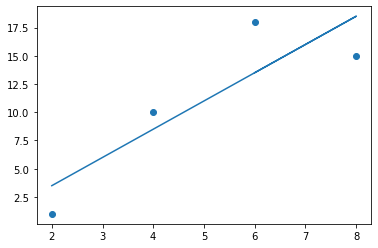

In [49]:
# Plot for the examples and best fit line given by model, only works for single feature.
plt.scatter(x, y)
plt.plot()
one = np.ones((np.array(x).shape[0], 1))
x_plot = np.hstack((one, x))
plt.plot(x, np.dot(np.array(x_plot), model1.theta))